In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from konlpy.tag import Komoran

In [2]:
data = pd.read_csv('train_data.csv')

In [13]:
data.head()

,text,label
0,이 영화 있는사람 공유 부탁합니다 제 폰번호 010 4427 2774 연락한통만요^-^;,0
1,작가때문에 1점 주려다가 영화가 너무 좋아서 10점줌비행기를 끌고 추운곳에다 추락시...,0
2,비밀번호가 뭐야? 서윤내사랑 ㅋ_ㅋ,0
3,용팔이 시르즈를 볼려면 어떻게 하는지.전화번호좀,0
4,보다 말았는데 심장 졸라 쫄깃해진다;; 근데 여주 졸라 답답함. 세면대 물기 닦는 ...,0


In [3]:
data.shape

(50180, 2)

In [5]:
tokenizer = Komoran()

In [6]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [11]:
print(data_tokenized[0])
print(data_tokenized[0][0])

['이/MM', '영화/NNG', '있/VV', '는/ETM', '사람/NNP', '공유/NNP', '부탁/NNG', '하/XSV', 'ㅂ니다/EC', '제/XPN', '폰/NNG', '번호/NNG', '010/SN', '4427/SN', '2774/SN', '연락/NNG', '한통/NNP', '만요/NNP', '^/SW', '-/SS', '^/SW', ';/SP']
이/MM


In [15]:
print(data_list[0])
print(data_list[0][0])


['이', '영화', '있', '사람', '공유', '부탁', '제', '폰', '번호', '010', '4427', '2774', '연락', '한통', '만요', '^', '^']
이


In [16]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 7.61135910721403
토큰 길이 최대: 69
토큰 길이 표준편차: 5.037248115716786


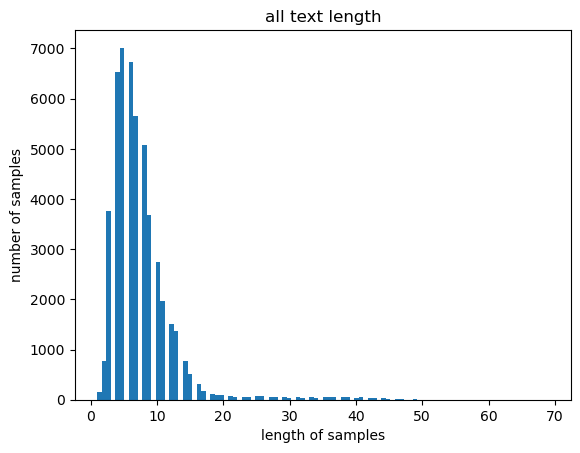

In [17]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9825827022718214


- 토큰 길이를 25로 설정한다면 전체 데이터의 약 99%정도 표현할 수 있는 결과가 나옴